# **THE SPARKS FOUNDATION**
# **TASK 2 - Prediction using Unsupervised ML**
Predict the optimum number of clusters and represent it visually.

GRIP MARCH2021 INTERN

Author - **Ashwini Singh**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [3]:
# Load the iris dataset
iris = pd.read_csv("/content/Iris (1).csv")

In [5]:
iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# shape of the data
iris.shape

(150, 6)

In [11]:
# checking total number of records for each species
iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
# checking for null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**First we need to find the optimum number of clusters for K-Means. Here we will use The Elbow Method to determine the value of k in K-Means.**
# **The Elbow Method**
**In Elbow method we calculate the Within-Cluster-Sum of Squared Errors (WCSS) for different values of k, and choose the k for which WCSS becomes first starts to diminish. In the plot of WCSS-versus-k, this is visible as an elbow.**
**As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.**

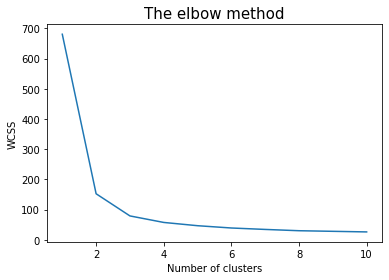

In [19]:
x = iris.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method',size="15")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [20]:
x = iris.iloc[:, :4].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pd.DataFrame({"Number of Clusters":range(1,11),"WCSS":wcss})

,Number of Clusters,WCSS
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.345409
4,5,46.535582
5,6,38.938740
6,7,34.190688
7,8,29.905374
8,9,27.927882
9,10,25.955497


**As expected, the plot looks like an arm with a clear elbow at k = 3.**

**Applying k-means to the dataset with Number of Clusters as k = 3**

In [21]:
#training the model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

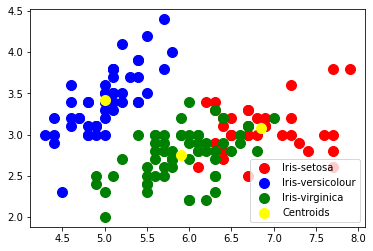

In [22]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

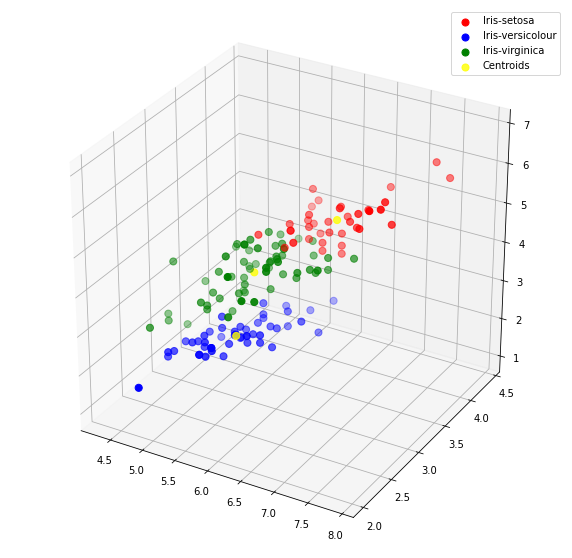

In [23]:
#Visualizing the clusters on the first three columns
plt.figure(figsize=[10,10])
ax = plt.axes(projection ="3d")
ax.scatter3D(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], 
             s = 50, c = "red", label = 'Iris-setosa')
ax.scatter3D(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], 
             s = 50, c = 'blue', label = 'Iris-versicolour')
ax.scatter3D(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], 
             s = 50, c = 'green', label = 'Iris-virginica')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],
            s = 50, c = 'yellow', label = 'Centroids', alpha = 0.8)

plt.legend()
plt.show()

The red points are the centroids, we can identify the center points of the data by using following code:

In [24]:
centers = kmeans.cluster_centers_
print(centers)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


We can compare the actual and predicted sepal length and width by plotting scatter plot.

**Predicting optimal number of clusters**

There are different methods to predict optimal number of clusters. We are using KMeans clustering in this task. This is a partitioning clustering which requires the user to specify the number of clusters to be generated.

First we are implementing K-means clustering:

Choosimg number of clusters k
Select random points(k) as centroids
Assigning all the points to the closest cluster centroid.
Recompute the centroids of newly formed clusters. Steps 3 and 4 are repeated

In [27]:
# KMeans
x = iris.iloc[:, [0, 1, 2, 3]].values
y = iris['Species']
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [28]:
# Encode for string labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

Text(0.5, 1.0, 'Predicted')

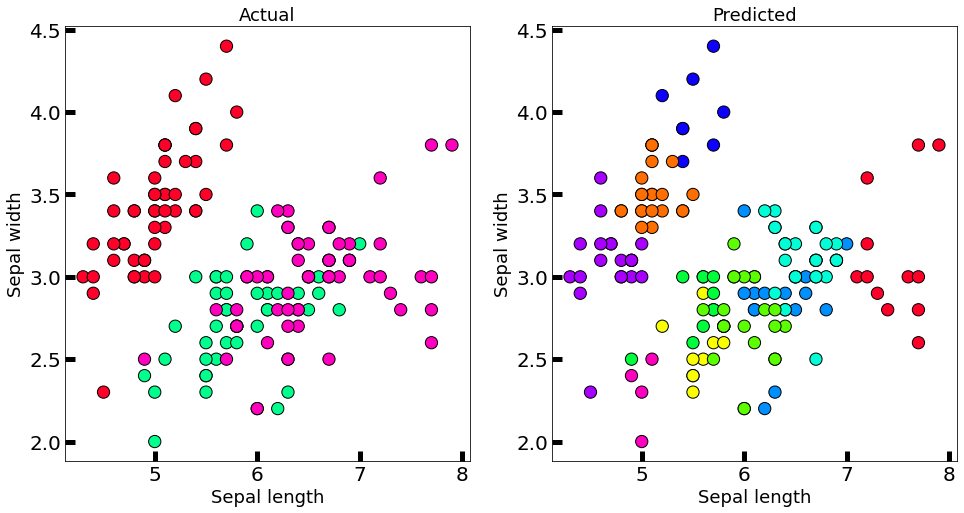

In [29]:
new_labels = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [30]:
#Testing model
sample = np.array([1.5,1.2,7.8,4])
test=sample.reshape(1, -1)
kmeans.predict(test)

array([3], dtype=int32)

# **PCA (Principal Component Analysis)**

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xp = pca.fit_transform(x)

**Plotting - to reorient the data from the original axes to the ones represented by the principal components**

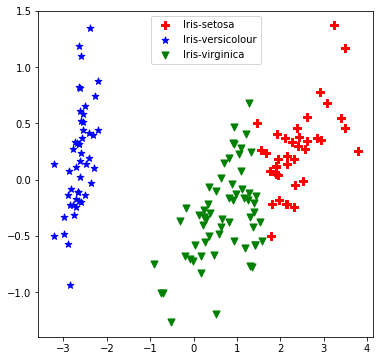

In [32]:
plt.figure(figsize=(6,6))

plt.scatter(xp[y_kmeans == 0, 0], xp[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa',marker='P')
plt.scatter(xp[y_kmeans == 1, 0], xp[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour',marker='*')
plt.scatter(xp[y_kmeans == 2, 0], xp[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica',marker='v')
plt.legend( loc='upper center')

# **Exploratory data analysis(EDA)**

**Bivariate analysis**

**Scatter plot**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


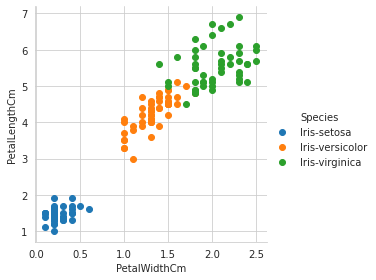

In [33]:
## Scatter plot between Petal width and petal length

sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4).map(plt.scatter, "PetalWidthCm", "PetalLengthCm").add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


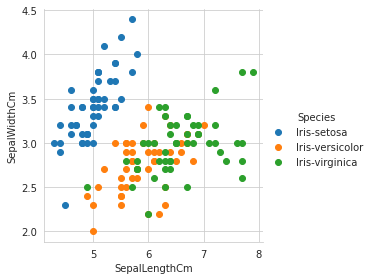

In [34]:
## Scatter plot between Sepal width and Sepal length
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


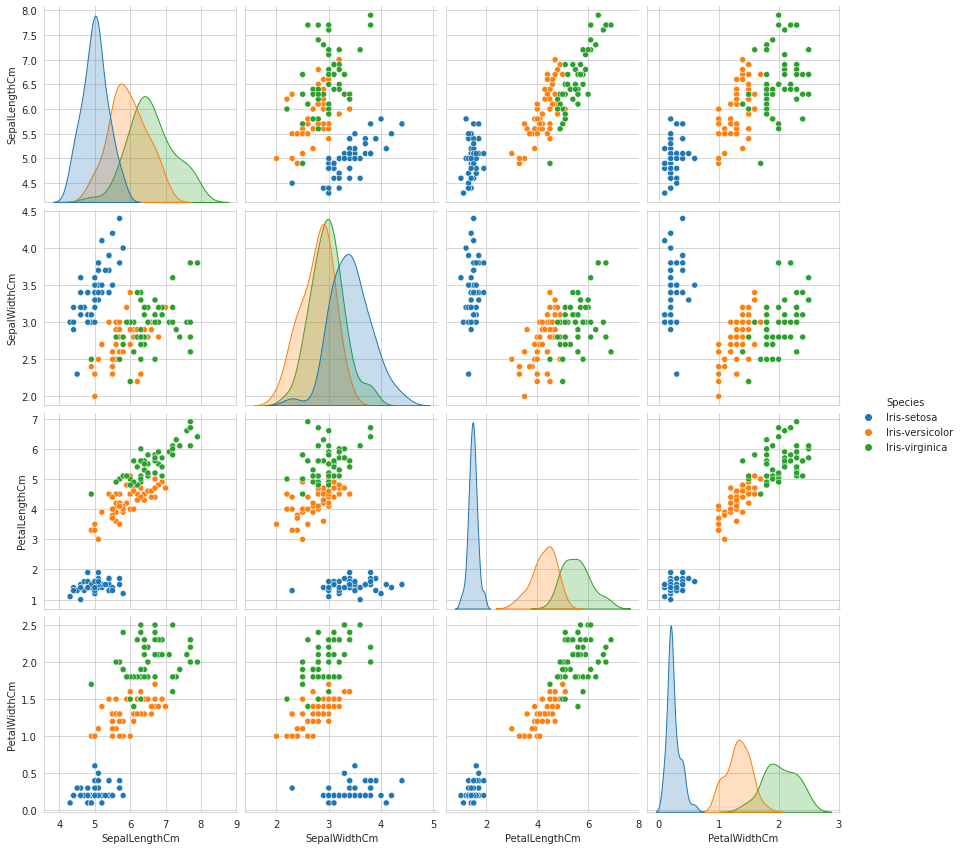

In [35]:
#Pair plot

plt.close()
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", size=3);
plt.show()

**Observation:**

From the above pair plot we can see that,

--Petal width and Petal Length of setosa species is easily separable.

--Sepal width and Sepal Length of all three species is overlapped.

--Petal length and petal width are more useful features to predict species type.

[]

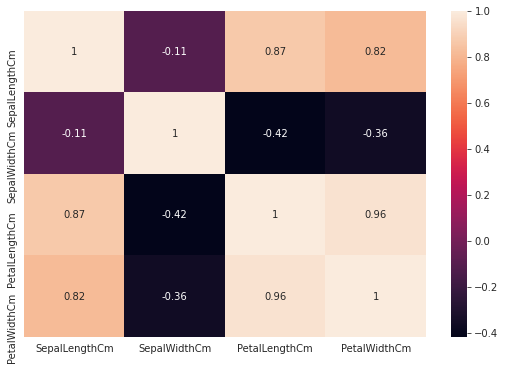

In [36]:
## heat map
plt.figure(figsize=(9,6))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

From the above heat map we can see that Sepal width and sepal length is slightly correlated with each other.

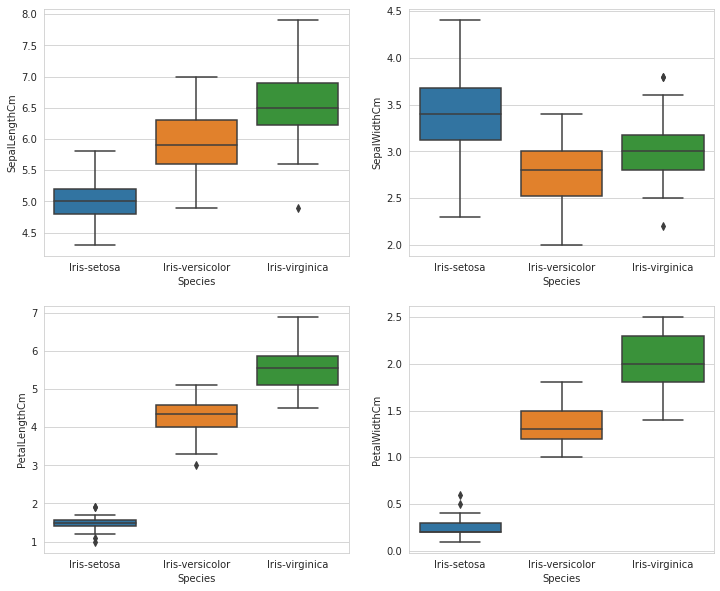

In [37]:
## Box plot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x= 'Species',y= 'SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x= 'Species',y= 'SepalWidthCm' ,data=iris)
plt.subplot(2,2,3)
sns.boxplot(x= 'Species' ,y= 'PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y= 'PetalWidthCm',data=iris)

Above boxplot shows the distribution of the input variables and outliers. From the boxplot we can see that iris-setosa is negatively skewed and have few outliers and other species are normally distributed.